<a href="https://colab.research.google.com/github/Eunjieater/DAP/blob/main/FINAL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **정신건강 통계에 관하여**\


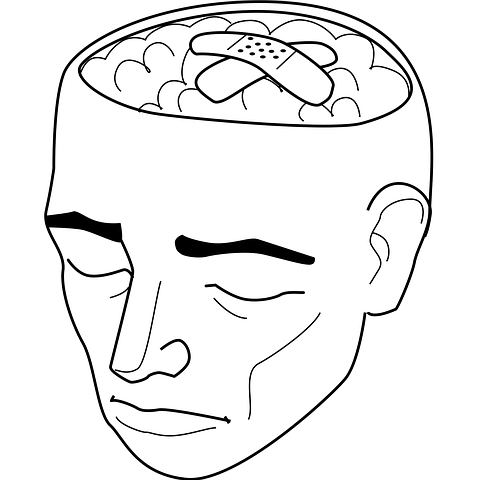

1990년대부터 2017년까지 나라 별로 나이, 증상들, 성별에 따른 발병률, 10만명 당 자살률과 우울증 발병률이 모두 여러 개의 시트에 나타나 있는 데이터를 사용하였습니다.

In [411]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# New Section

In [412]:
filename = 'https://github.com/Eunjieater/DATA_ANALYSYS_FINAL/blob/main/Mental_health.xlsx?raw=true'
df = pd.read_excel(filename)
df.head()
#myfile = files.upload()
#https://data.world/vizzup/mental-health-depression-disorder-data 

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


데이터 전처리

In [413]:
df_age = pd.read_excel(io=filename, sheet_name=1)
df_age_ns = df_age[(df_age.Entity=='North Korea') | (df_age.Entity=='South Korea')]
df_age_north = df_age[df_age.Entity=='North Korea']
df_age_south = df_age[df_age.Entity=='South Korea']
df_age.head()
#나이 별, 이를 또 나라 별로 따지기 위해 df_age를 sheet 2번째 장에서 가져온다.
#이를 조건문을 이용하여 한국와 북한을 함께 지닌 데이터로 Row-wise Filtering을 하였다.
#이를 다시 한국, 북한으로 다시 나누어 주었다.


,Entity,Code,Year,20-24 years old (%),10-14 years old (%),All ages (%),70+ years old (%),30-34 years old (%),15-19 years old (%),25-29 years old (%),50-69 years old (%),Age-standardized (%),15-49 years old (%)
0,Afghanistan,AFG,1990,4.417802,1.594676,3.218871,5.202803,5.799034,3.455708,5.175856,5.917752,4.071831,4.939766
1,Afghanistan,AFG,1991,4.433524,1.588356,3.203468,5.192849,5.814828,3.451880,5.176729,5.927093,4.079531,4.902682
2,Afghanistan,AFG,1992,4.453689,1.577980,3.156559,5.176872,5.829745,3.434982,5.160249,5.945656,4.088358,4.837097
3,Afghanistan,AFG,1993,4.464517,1.577201,3.120655,5.167355,5.853060,3.420210,5.148767,5.966915,4.096190,4.813657
4,Afghanistan,AFG,1994,4.462960,1.570846,3.082179,5.157549,5.852851,3.425222,5.148227,5.975907,4.099582,4.839340


In [414]:
df_disorder = pd.read_excel(io=filename, sheet_name=0)
df_disorder_ns = df_disorder[(df_disorder.Entity=='North Korea') | (df_disorder.Entity=='South Korea')]
df_disorder_south = df_disorder[(df_disorder['Entity']=='South Korea')]
df_disorder_north = df_disorder[(df_disorder['Entity']=='North Korea')]
#증상별로 나누어주고 싶어서 이를 엑셀 데이터 1번째 시트에서 가져왔고, 이 데이터 또한
#Row-wise Filtering을 통해서 한국와 북한으로 나누어 주었다.

In [415]:
df_sex = pd.read_excel(io=filename, sheet_name=2)
df_sex = df_sex.dropna()
df_sex_south = df_sex[(df_sex['Entity']=='South Korea')]
df_sex_north = df_sex[(df_sex['Entity']=='North Korea')]
df_sex_north.mean()
#성별로 나누어진 데이터가 3번째 시트에 있기에 이를 가져와주었고, 몇몇 연도들에는 Nan 값이 꽤 존재했기에
#이를 dropna()를 이용해 데이터프레임에서 삭제해주었고, 이 또한 한국과 북한으로 나누어 주었다.
#나는 여기서 prevalence in males와 prevalence in females의 전처리를 통해 평균 값을 이용하여 pie graph를 만드려고 하는데,
#df_sex_north.mean()만 일단 보여주기 위해 만들어줬다. 

Year                         2.003500e+03
Prevalence in males (%)      2.393576e+00
Prevalence in females (%)    3.797244e+00
Population                   2.334839e+07
dtype: float64

In [416]:
df_sui_and_dep = pd.read_excel(io=filename, sheet_name=3)
df_sui_and_dep_ns = df_sui_and_dep[(df_sui_and_dep.Entity=='North Korea') | (df_sui_and_dep.Entity=='South Korea')]
df_sui_and_dep_south = df_sui_and_dep[(df_sui_and_dep['Entity']=='South Korea')]
df_sui_and_dep_north = df_sui_and_dep[(df_sui_and_dep['Entity']=='North Korea')]

In [417]:
df_age_all_n = df_age_north.groupby(['Year'])['All ages (%)'].sum()
df_age_all_s = df_age_south.groupby(['Year'])['All ages (%)'].sum()

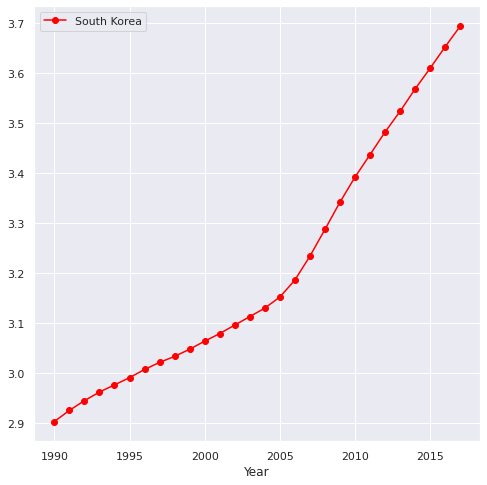

In [418]:
#plt.plot(df_age_all_n, color='red')
#plt.title('North Korea')
#plt.xlabel('Year')
#plt.show()
df_age_all_s.plot(kind='line', color='red', figsize=(8,8), label='South Korea', marker='o').legend()

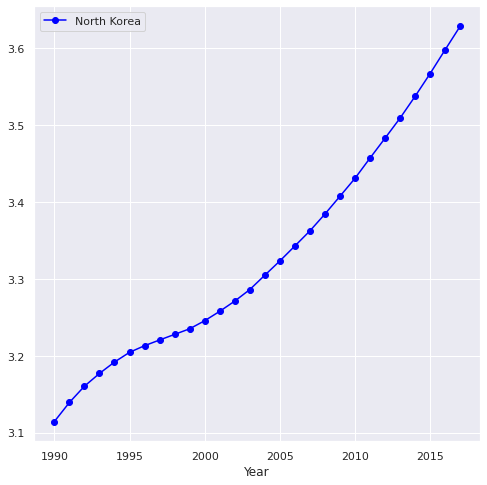

In [419]:
df_age_all_n.plot(kind='line', color='blue', figsize=(8,8), label='North Korea', marker='o').legend()
#이 그래프를 보게 되면 시간이 지날 수록 정신질병을 가진 사람들이 들어난다는 것을 볼 수 있다.
#이는 각 나라 별 비율이 이렇게 된다는 것이고, 2010년에서 2015년을 넘어가는 시점에 무심코 보게 되면 북한이 남한보다
#정신건강이 안좋은 수가 훨씬 많구나 라고 느낄 수 있는데, 이는 인구 수가 아닌, 수 대비 비율이기 때문에 그 점을 고려해야한다.
#한국을 보게 되면 2005년 기점으로 급격하게 늘어나는 것을 볼 수 있다.

In [420]:
#df_age_all_n_2017 = df_age_north[df_age_north.Year=='2017']
#df_age_all_s_2017 = df_age_south.groupby(['Year'])['All ages (%)'].sum()
df_age_all_2017 = df_age_ns[df_age_ns.Year.isin(['2017'])]
df_age_all_2017 
#2017년도가 제일 최근 데이터이므로 이를 다루기 위해 Row-wise Filtering-condition을 통해서 
#north와 south가 함께 존재하는 df_age_ns 에서 2017년도 data를 뽑아서 가져와 df_age_all_2017에 입력하였다.

,Entity,Code,Year,20-24 years old (%),10-14 years old (%),All ages (%),70+ years old (%),30-34 years old (%),15-19 years old (%),25-29 years old (%),50-69 years old (%),Age-standardized (%),15-49 years old (%)
4199,North Korea,PRK,2017,2.340213,0.930907,3.628262,7.372738,2.899776,1.942616,2.583567,6.312630,3.090846,3.124347
5235,South Korea,KOR,2017,4.352662,1.339181,3.693972,4.533090,4.171113,3.283471,4.269872,4.034614,3.165684,4.044199


In [421]:
df_age_all_2017 = df_age_all_2017.filter(['Entity', '15-49 years old (%)', '50-69 years old (%)','70+ years old (%)'])
df_age_all_2017
#위에서 내가 사용하고 싶었던 것은 15세 이상 50세 미만 data와, 50세 이상 70세 미만 데이터, 70세 이상 데이터였으므로
#Column-wise Filtration을 통해서 이를 가져와줬고, 나는 이를 두 나라를 나란히 표시한 다중 막대 그래프로 표현하고 싶었는데,
#이를 위해서는 Entity 값도 필요했기 때문에 이 또한 가져온 후, 다시 똑같은 dataframe에 업데이트 시켜줬다.

,Entity,15-49 years old (%),50-69 years old (%),70+ years old (%)
4199,North Korea,3.124347,6.312630,7.372738
5235,South Korea,4.044199,4.034614,4.533090


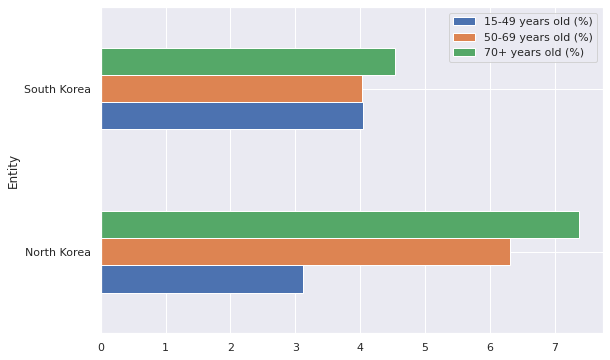

In [422]:
df_age_all_2017.plot(x='Entity', y=['15-49 years old (%)', '50-69 years old (%)','70+ years old (%)'], kind='barh', figsize=(9, 6))

#다중 막대 그래프를 그리는 것과 통시에 가로형 막대 그래프가 보기 편할 것 같았으므로,
#kind='barh'를 넣어주어 가로로 만들어줬다.
#이에서는 15세 이상 50세 미만은 각 나라의 인구에 따른 비율이 남한이 북한보다 높고, 
#50세 이상 70세 미만과 70세 이상은 각 나라의 인구에 따른 비율이 북한이 남한보다 높다.
#여기선 인구 대비 정신병을 가진 사람들이 나이가 들수록 그 비율 또한 더 높아진다는 것을 알 수 있다.
#하지만 남한에서는 15세 이상, 50세 미만의 비율이 50세 이상, 70세 미만의 비율보다 살짝 높다는 것을 알 수 있다.
#여기서 유의해야 할 점은 15세 이상과 50세 미만이 포함하고 있는 나이의 범위가 50세 이상 70세 미만보다 높다는 것이다.

In [423]:
df_sex_sm = df_sex_south.filter(['Prevalence in males (%)', 'Prevalence in females (%)']).mean()
df_sex_nm = df_sex_north.filter(['Prevalence in males (%)', 'Prevalence in females (%)']).mean()
df_sex_sm
#df_sex_south에서 Colunm wise filtering을 이용해 여자, 남자 발병률의 평균들을 가져왔고,
#이를 pie 로 바꾸기 위해 상대도수의 합을 1이라 하고 south의 mean 비율을 따지면
#males : females = 0.3735620933 : 0.6264379067 이 되고, 
#이를 각도로 바꿔주게 되면 134.482353588 : 225.517646412 가 된다.
#population scaling으로 보여주기

Prevalence in males (%)      2.169717
Prevalence in females (%)    3.638466
dtype: float64

In [424]:
df_sex_nm
#df_sex_north에서 Colunm wise filtering을 이용해 여자, 남자 발병률의 평균들을 가져왔고,
#이를 pie 로 바꾸기 위해 상대도수의 합을 1이라 하고 south의 mean 비율을 따지면
#males : females = 0.3866331115 : 0.6133668885 이 되고, 
#이를 각도로 바꿔주게 되면 139.18792014 : 220.81207986 가 된다.

Prevalence in males (%)      2.393576
Prevalence in females (%)    3.797244
dtype: float64

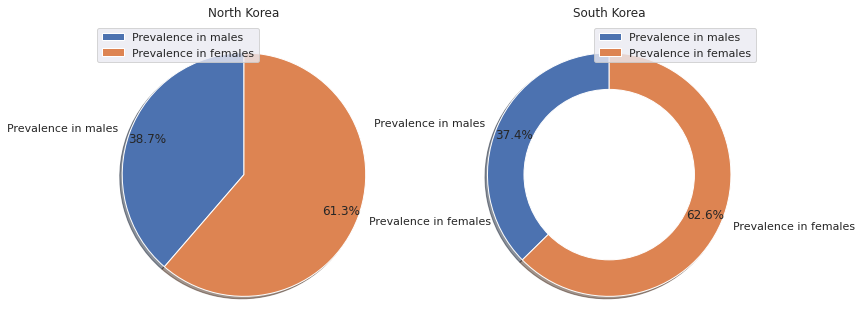

In [425]:
from matplotlib.figure import figaspect
label = ['Prevalence in males', 'Prevalence in females']
frequency_n = [38.66331116, 61.33668885]
frequency_s = [37.35620933, 62.64379067]


fig, ax = plt.subplots(1, 2, figsize=(12,6))

#0번 그래프
ax[0].pie(frequency_n, 
       startangle=90,
       labels = label,
       autopct='%1.1f%%', 
       pctdistance=0.85, 
       shadow = True,
) 

ax[1].pie(frequency_s, 
       startangle=90,
       labels = label,
       autopct='%1.1f%%', 
       pctdistance=0.85, 
       shadow = True,
) 

#draw white circle in the middle
centre_circle = plt.Circle((0,0), 0.7, color='white')
figt = plt.gcf()
fig.gca().add_artist(centre_circle)

ax[0].set_title('North Korea')
ax[1].set_title('South Korea')
ax[0].legend(labels=label, loc='upper left')
ax[1].legend(labels=label, loc='upper right')
plt.show()
#lecture4.ipynb 과제 참고
#https://dailyheumsi.tistory.com/36 - fig, ax 배열이용
#label을 prevalence in males와 prevalence in females로 두고, north Korea를 먼저 그리기 위해 
#frequency_n을 계산하여 설정해줬다. 배경의 크기는 6, 6으로 설정해 줬고, 
#pie 설정 내부에 빈도수, 각도가 시작되는 위치, label, 얼마나 비율을 표현해 줄 것인지(여기서 소수점 1자리수까지 표현하게 만듦),
#또한 pctdistance 인자를 통해서 퍼센트 텍스트의 위치를 중심에서 얼마나 멀게 할지 정하고, 그림자가 나타나게 해줬다.
#여기서 lecture4 과제에서 수행한 것과 같이 가운데에 존재하는 원에 대하여 좌표, 크기, 색깔을 정해 줬고,
#gcf()를 통해 현재의 figure 객체를, gca()를 통해 현재의 axes를 구해준 후, add_artist를 이용하여 가운데 원을 그려줬다.
#tight_layout 함수를 입력 없이 사용함으로써 기존에 세팅된 기본값을 이용해 자동으로 레이아웃을 설정해 주었다.
#이제 마지막으로 제목을 붙이고, legend 함수와 이 안의 파라미터 loc를 이용하여 위쪽 우측에 legend labels가 생기게 해주었다.
#다양성을 주기 위해 north는 일반 pie 형태, south는 도넛 형태로 그렸다.

In [426]:
#증상별에서는 조현병, 조울증, 섭식장애, 분노장애, 약물장애, 우울, 알코올 장애가 있는데 
#나는 여기서 연도에 따라서 증상별로 그래프를 그려 남한과 북한의 비율 차이를 알 것이고,
#또한 어떤 것이 증가되고 어떤 것이 감소되었는지를 알 것이다.
#상관계수를 통하여 증상 간 correlation coefficient가 어떤지도 볼 것이다. - Regression
#이 때, 예로 south tables를 보면 0.2부터 3-4까지 있는 것을 볼 수 있다. 
#비슷하게 scaling을 해주고 싶고, 나는 양수값으로 scaling이 되길 원하며,
# min-max scaling을 해주었다.
#####scaling이 필요치 않음 -> 숫자 값만 빼줌
#그리고 Entity와 Code는 string이고, encoding하면 오히려 복잡해질 것으로 생각했기 때문에 숫자값들로만
#Column-Slicing 해주었다.
#나중에 concat 위해 year빼두기
df_later_ny = df_disorder_north.loc[:, ['Year']]
df_later_sy = df_disorder_south.loc[:, ['Year']]
df_disorder_south_s = df_disorder_south.loc[:, 'Schizophrenia (%)':'Alcohol use disorders (%)']
df_disorder_north_n = df_disorder_north.loc[:, 'Schizophrenia (%)':'Alcohol use disorders (%)']

#df_disorder_south.head()
df_later_ny.index = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', 
                     '19', '20', '21', '22', '23', '24', '25', '26', '27']
df_later_sy.index = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', 
                     '19', '20', '21', '22', '23', '24', '25', '26', '27']

In [427]:
#그런데 여기서 상대적으로 너무 낮은 값은 0으로, 높은 값은 1로 뜨기 때문에 robust로 하면, 
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_robust_s = pd.DataFrame(scaler.fit_transform(df_disorder_south_s), columns=df_disorder_south_s.columns)
df_robust_n = pd.DataFrame(scaler.fit_transform(df_disorder_north_n), columns=df_disorder_north_n.columns)
df_robust_s.head()

,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,-1.213745,-1.350124,-1.248267,-0.942587,-0.778563,-0.231447,-0.845010
1,-1.154720,-1.225488,-1.120642,-0.826700,-0.718472,-0.236026,-0.384325
2,-1.088476,-1.100897,-1.013156,-0.712427,-0.644640,-0.236360,0.005451
3,-1.017530,-0.981708,-0.903666,-0.607319,-0.564868,-0.224164,0.304581
4,-0.948676,-0.875481,-0.793827,-0.519453,-0.508921,-0.216951,0.493664


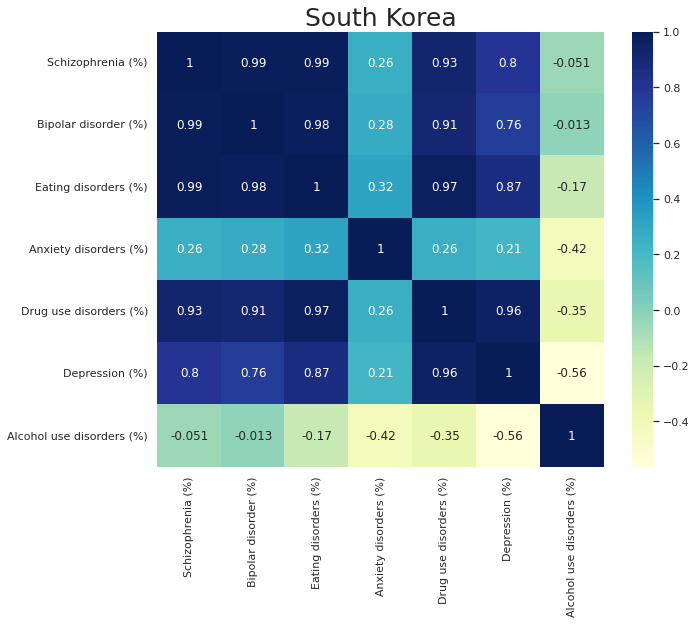

In [428]:
#https://www.delftstack.com/ko/howto/seaborn/size-of-seaborn-heatmap/ 
#heatmap 파라미터들 정의
corr=df_robust_s.corr()
sns.set(rc = {'figure.figsize':(10, 8)})
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.title('South Korea', fontsize=25)
plt.show()

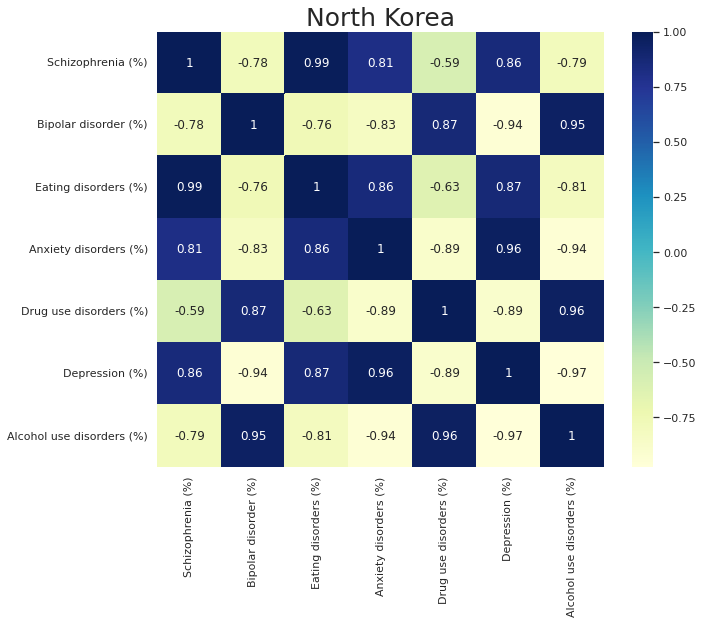

In [429]:
corr=df_robust_n.corr()
sns.set(rc = {'figure.figsize':(10, 8)})
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.title('North Korea', fontsize=25)
plt.show()

In [430]:
#상관계수 모두 봤으니 이제 시각화 위해 CONCAT
#이 떄, robust 첫번째 행이 0부터 시작하므로 year 데이터프레임을 따로 만들어야함.
new_data = {'Year' : ['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
                      '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', 
                     '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']}
new_df = pd.DataFrame(new_data)

df_disorder_south_s.index=['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
                      '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', 
                     '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
df_disorder_north_n.index=['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
                      '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', 
                     '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
#https://seong6496.tistory.com/73 : set_index
#df_do_south.set_index('Year', inplace=True)
#df_do_north.set_index('Year', inplace=True)

Text(0.5, 1.0, 'Schizophrenia (%) ')

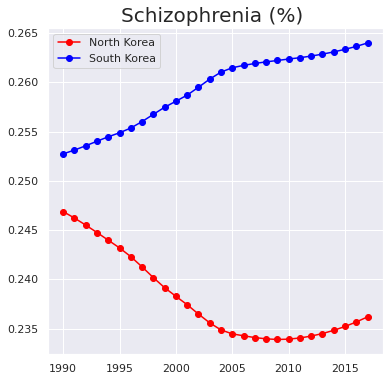

In [431]:
df_disorder_north_n['Schizophrenia (%)'].plot(kind='line', color='red', figsize=(6, 6), label='North Korea', marker='o').legend()
df_disorder_south_s['Schizophrenia (%)'].plot(kind='line', color='blue', label='South Korea', marker='o').legend()
plt.title("Schizophrenia (%) ", fontsize=20)

Text(0.5, 1.0, 'Bipolar disorder (%)')

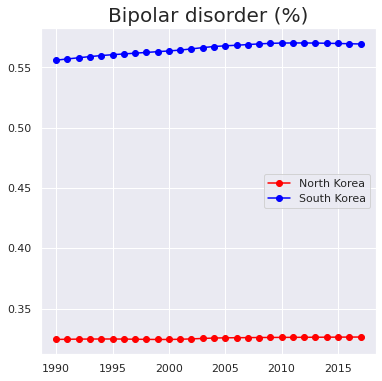

In [432]:
df_disorder_north_n['Bipolar disorder (%)'].plot(kind='line', color='red', figsize=(6, 6), label='North Korea', marker='o').legend()
df_disorder_south_s['Bipolar disorder (%)'].plot(kind='line', color='blue', label='South Korea', marker='o').legend()
plt.title("Bipolar disorder (%)", fontsize=20)

Text(0.5, 1.0, 'Eating disorders (%)')

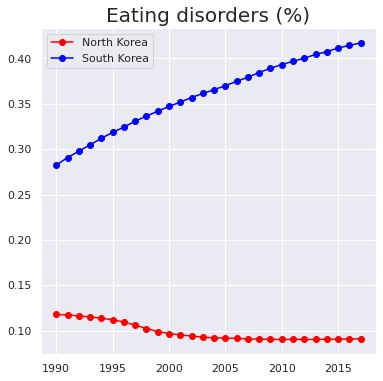

In [433]:
df_disorder_north_n['Eating disorders (%)'].plot(kind='line', color='red', figsize=(6, 6), label='North Korea', marker='o').legend()
df_disorder_south_s['Eating disorders (%)'].plot(kind='line', color='blue', label='South Korea', marker='o').legend()
plt.title("Eating disorders (%)", fontsize=20)

Text(0.5, 1.0, 'Anxiety disorders (%)')

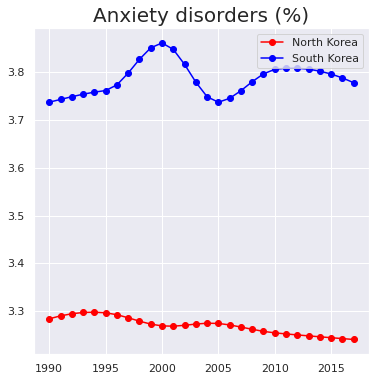

In [434]:
df_disorder_north_n['Anxiety disorders (%)'].plot(kind='line', color='red', figsize=(6, 6), label='North Korea', marker='o').legend()
df_disorder_south_s['Anxiety disorders (%)'].plot(kind='line', color='blue', label='South Korea', marker='o').legend()
plt.title("Anxiety disorders (%)", fontsize=20)

Text(0.5, 1.0, 'Drug use disorders (%)')

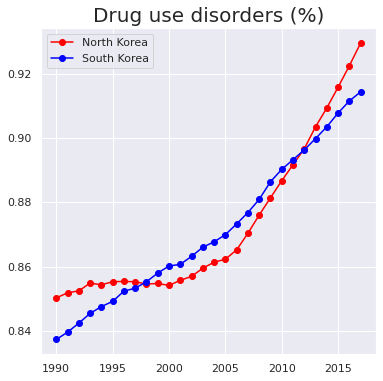

In [435]:
df_disorder_north_n['Drug use disorders (%)'].plot(kind='line', color='red', figsize=(6, 6), label='North Korea', marker='o').legend()
df_disorder_south_s['Drug use disorders (%)'].plot(kind='line', color='blue', label='South Korea', marker='o').legend()
plt.title("Drug use disorders (%)", fontsize=20)

Text(0.5, 1.0, 'Depression (%)')

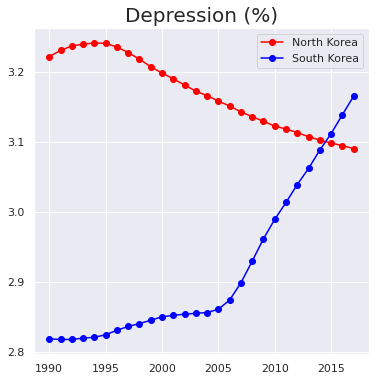

In [436]:
df_disorder_north_n['Depression (%)'].plot(kind='line', color='red', figsize=(6, 6), label='North Korea', marker='o').legend()
df_disorder_south_s['Depression (%)'].plot(kind='line', color='blue', label='South Korea', marker='o').legend()
plt.title("Depression (%)", fontsize=20)

Text(0.5, 1.0, 'Alcohol use disorders (%)')

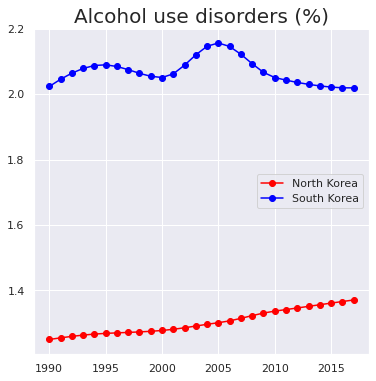

In [437]:
df_disorder_north_n['Alcohol use disorders (%)'].plot(kind='line', color='red', figsize=(6, 6), label='North Korea', marker='o').legend()
df_disorder_south_s['Alcohol use disorders (%)'].plot(kind='line', color='blue', label='South Korea', marker='o').legend()
plt.title("Alcohol use disorders (%)", fontsize=20)